GTI770 - Systèmes Intelligents et Apprentissage Machine

Alessandro L. Koerich

Notebook Jupyter - 10_SVM_UppercaseHandwriting_26Classes

July 2018

In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
import numpy as np

In [29]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [30]:
# Load data from file
# NIST Train 26 Classes Uppercase Handwritten Characters
# 37,440 samples for training
# 12,092 samples for validation
# 11,941 samples for testing
# 108-dimensional feature vectors
# 26 classes (A-Z uppercase characters)

TrainData = np.loadtxt('CSV_Files/NISTUpperHandwritten_train.csv', delimiter=' ', dtype=np.str)
ValidData = np.loadtxt('CSV_Files/NISTUpperHandwritten_valid.csv', delimiter=' ', dtype=np.str)
TestData  = np.loadtxt('CSV_Files/NISTUpperHandwritten_test.csv' , delimiter=' ', dtype=np.str)

Xtrain =TrainData[0:37439,0:108].astype(np.float)
Ytrain =TrainData[0:37439,108:134].astype(np.int)

Xvalid = ValidData[0:12091,0:108].astype(np.float)
Yvalid = ValidData[0:12091,108:134].astype(np.int)

Xtest  = TestData[0:11940,0:108].astype(np.float)
Ytest  = TestData[0:11940,108:134].astype(np.int)

In [31]:
Xtrain

array([[0.18, 0.19, 0.19, ..., 0.  , 0.11, 0.02],
       [0.12, 0.07, 0.04, ..., 0.03, 0.14, 0.03],
       [0.27, 0.24, 0.21, ..., 0.  , 0.11, 0.  ],
       ...,
       [0.29, 0.23, 0.17, ..., 0.  , 0.03, 0.2 ],
       [0.24, 0.18, 0.1 , ..., 0.  , 0.26, 0.  ],
       [0.07, 0.06, 0.19, ..., 0.  , 0.  , 0.02]])

In [32]:
Ytrain

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [33]:
from numpy import argmax
Ytrain2 = argmax(Ytrain, axis=1)
Yvalid2 = argmax(Yvalid, axis=1)
Ytest2  = argmax(Ytest, axis=1)

In [34]:
# normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
Xtrain = scaler.fit_transform(Xtrain)
Xvalid = scaler.fit_transform(Xvalid)
Xtest  = scaler.fit_transform(Xtest)

In [35]:
Ytrain2

array([22, 22, 20, ..., 10,  9, 25])

In [36]:
num_classes = Ytrain.shape[1]
input_dim = Xtrain.shape[1]

In [37]:
input_dim

108

In [38]:
num_classes

26

In [39]:
def linearSVM_model():
    print("SVM with Linear Kernel\n")
    # create model
    model = svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=1, gamma='auto', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True,
    tol=0.001, verbose=True)

    return model

In [40]:
# Build the model
# Choose one at each time
model = linearSVM_model()

SVM with Linear Kernel



In [41]:
# Fit the model (TRAIN)
model.fit(Xtrain, Ytrain2)

[LibSVM]

KeyboardInterrupt: 

In [15]:
# Use the model to predict the class of samples
# Notice that we are testing the train dataset
Ytrain_pred = model.predict(Xtrain)
Ytrain_pred

Yvalid_pred = model.predict(Xvalid)
Yvalid_pred

Ytest_pred = model.predict(Xtest)
Ytest_pred

array([ 0,  0,  0, ..., 25, 25, 25])

In [16]:
# You can also predict the probability of each class
# train dataset
Ytrain_pred_prob = model.predict_proba(Xtrain)
Ytrain_pred_prob

Yvalid_pred_prob = model.predict_proba(Xvalid)
Yvalid_pred_prob

Ytest_pred_prob = model.predict_proba(Xtest)
Ytest_pred_prob

array([[6.94314655e-01, 8.12074800e-04, 1.62359376e-04, ...,
        1.51262288e-02, 4.96721752e-03, 3.32066608e-04],
       [9.94407130e-01, 1.02014918e-04, 1.45715143e-06, ...,
        2.72864462e-06, 5.35641313e-07, 4.29524962e-07],
       [4.74175375e-01, 7.42430826e-03, 2.65877083e-03, ...,
        9.44517996e-03, 3.61616590e-03, 2.11512720e-03],
       ...,
       [3.53638949e-06, 7.29520872e-06, 9.68238643e-06, ...,
        2.70207846e-05, 3.52812836e-06, 9.99267077e-01],
       [9.98997908e-06, 4.60186230e-05, 4.78240746e-04, ...,
        1.06424554e-04, 2.90362736e-05, 9.89077261e-01],
       [1.49819244e-05, 3.54622820e-05, 5.96812404e-05, ...,
        2.15098831e-03, 4.53189399e-05, 9.90359848e-01]])

In [17]:
# Evaluation metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Final evaluation of the model (On the Training, Validation or Test dataset)
scores = accuracy_score(Ytrain2, Ytrain_pred )
print("Correct classification rate for the training dataset = "+str(scores*100)+"%")

scores2 = accuracy_score(Yvalid2, Yvalid_pred )
print("Correct classification rate for the validation dataset = "+str(scores2*100)+"%")

scores3 = accuracy_score(Ytest2, Ytest_pred )
print("Correct classification rate for the test dataset = "+str(scores3*100)+"%")

Correct classification rate for the training dataset = 96.96038889927615%
Correct classification rate for the validation dataset = 94.49177073856588%
Correct classification rate for the test dataset = 92.94807370184255%


In [18]:
from sklearn.metrics import classification_report
target_names = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
print( classification_report(Yvalid2, Yvalid_pred, target_names=target_names))
# This works, but we have labels with no predicted samples

              precision    recall  f1-score   support

           A       0.95      0.94      0.95       449
           B       0.97      0.90      0.93       439
           C       0.95      0.98      0.97       525
           D       0.93      0.95      0.94       466
           E       0.93      0.96      0.95       390
           F       0.95      0.97      0.96       428
           G       0.98      0.94      0.96       425
           H       0.87      0.97      0.92       421
           I       0.99      0.93      0.96       740
           J       0.94      0.98      0.96       429
           K       0.93      0.94      0.93       411
           L       0.98      0.96      0.97       500
           M       0.96      0.89      0.93       450
           N       0.91      0.93      0.92       471
           O       0.93      0.92      0.93       472
           P       0.97      0.96      0.96       465
           Q       0.97      0.92      0.95       450
           R       0.94    

In [19]:
# Predict and show the confusion matrix (For the Validation dataset)
cm = confusion_matrix(Yvalid2, Yvalid_pred )

In [20]:
import itertools
import matplotlib.pyplot as plt

In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect = 'auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    #plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [22]:
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure(figsize = (20,20))
plot_confusion_matrix(cm, classes = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
, title='Confusion matrix, without normalization')

Confusion matrix, without normalization
[[424   0   0   0   0   2   0  16   0   0   3   0   1   0   0   0   0   0
    0   0   1   0   0   2   0   0]
 [  5 397   0   6   1   1   3   1   0   0   1   0   0   0   7   2   0   8
    5   0   1   0   0   0   0   1]
 [  0   0 516   0   0   1   1   0   0   0   0   2   0   0   2   3   0   0
    0   0   0   0   0   0   0   0]
 [  1   2   0 441   0   0   0   0   0   2   0   0   1   0  11   3   1   0
    0   0   2   0   0   1   1   0]
 [  0   1   3   0 376   3   4   0   1   0   0   0   0   0   0   0   0   0
    0   0   1   0   0   0   1   0]
 [  0   0   0   0   0 415   0   0   0   0   1   0   0   0   0   3   0   0
    0   7   0   1   0   0   0   1]
 [  2   4   6   0   3   2 399   1   0   1   0   1   0   0   1   0   3   0
    0   0   2   0   0   0   0   0]
 [  2   0   0   0   0   0   0 408   0   0   1   0   3   3   0   0   0   0
    0   0   2   1   0   0   1   0]
 [  0   0   0   0   7   3   0   0 690  17   0   2   0   0   0   0   0   0
   11   1   0 

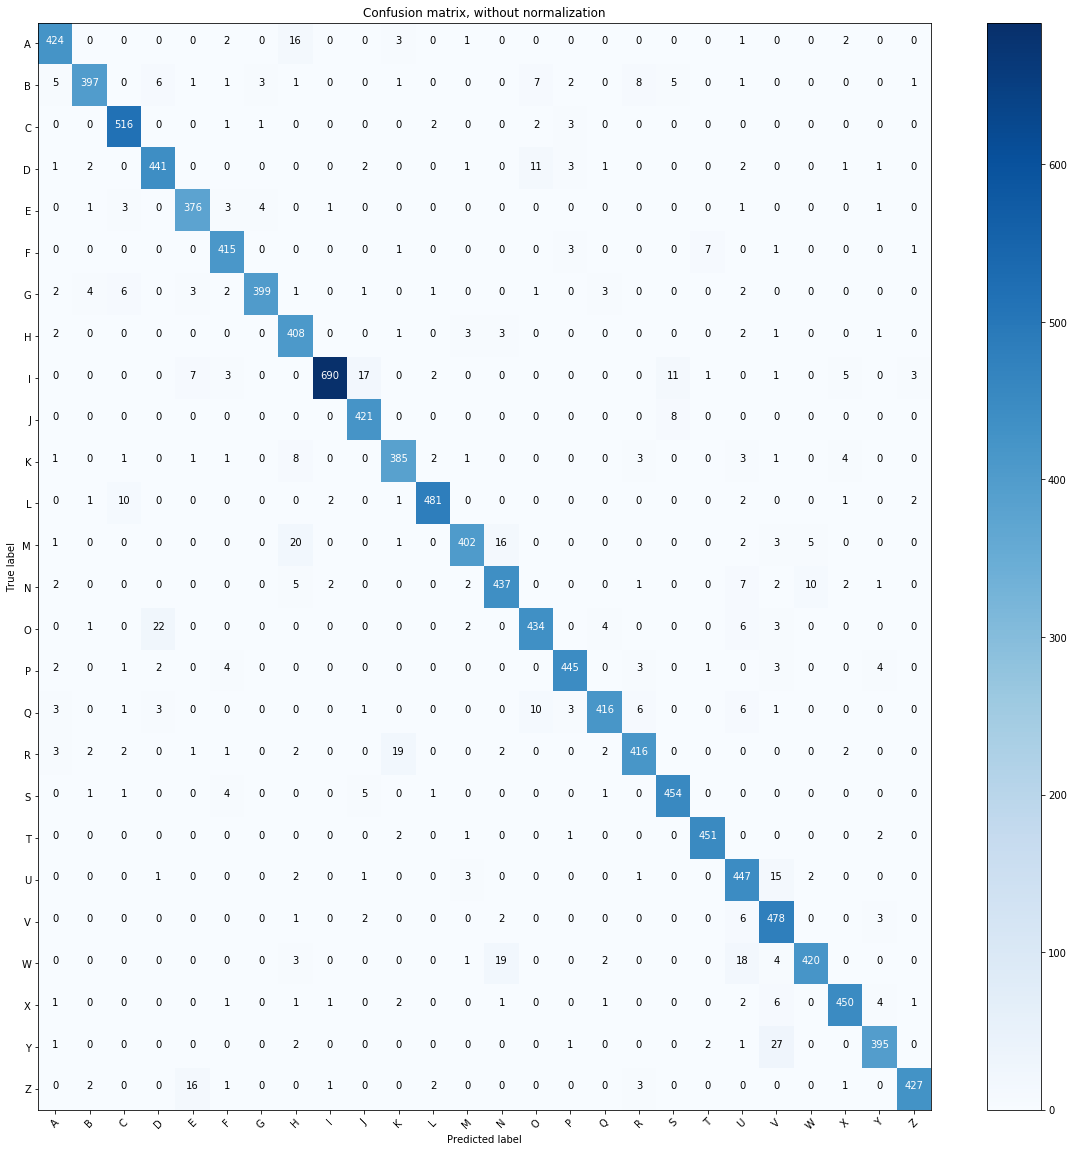

In [23]:
plt.show()

In [24]:
# Plot normalized confusion matrix
plt.figure(figsize = (20,20))
plot_confusion_matrix(cm, classes = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
, normalize=True, title='Confusion matrix, with normalization')

Normalized confusion matrix
[[0.94 0.   0.   0.   0.   0.   0.   0.04 0.   0.   0.01 0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.01 0.9  0.   0.01 0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.
  0.02 0.   0.   0.02 0.01 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.98 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.95 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.02 0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.01 0.   0.96 0.01 0.01 0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.97 0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.01 0.   0.   0.   0.02 0.   0.   0.   0.   0.   0.  ]
 [0.   0.01 0.01 0.   0.01 0.   0.94 0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.97

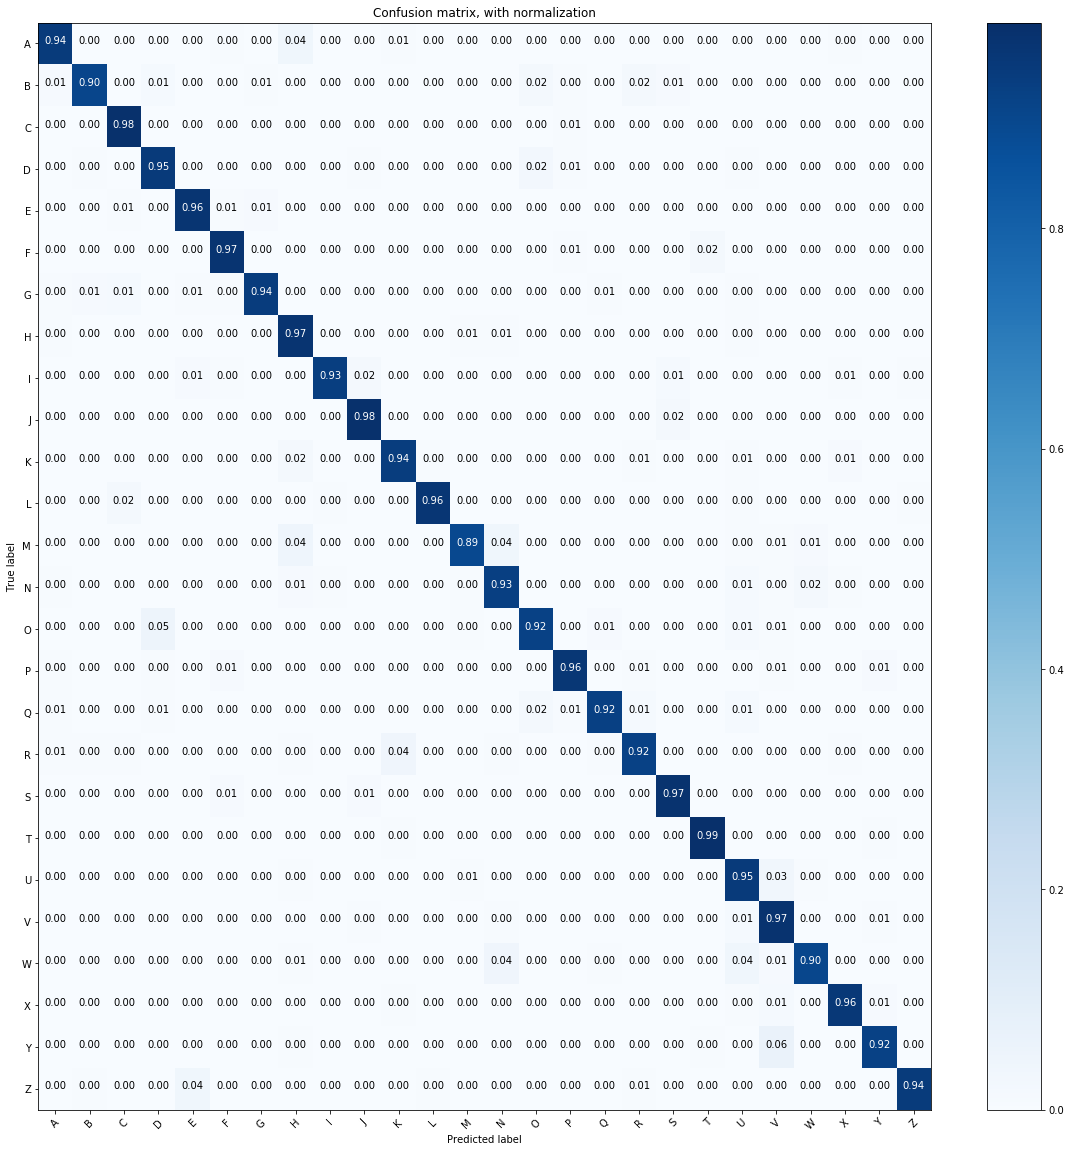

In [25]:
plt.show()

- HYPERPARAMETER OPTIMIZATION

OK, but we didn't optimize the parameters of the SVM, such as:

1) Kernel

2) Cost 

3) Kernel parameters (gamma)

But now, we already have a pre-defined VALIDATION dataset! So, we don't need to split the dataset and use cross-validation.

We will use the hypopt Python package (pip install hypopt). It's a professional package created specifically for parameter optimization with a validation set. It works with any scikit-learn model out-of-the-box and can be used with Tensorflow, PyTorch, etc. as well.

https://pypi.org/project/hypopt/1.0.0/

In [26]:
# Set the parameters by cross-validation
# Assuming you already have train, test, val sets and a model.
from hypopt import GridSearch
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3], 'C': [100, 1000]},
                    {'kernel': ['linear'], 'C': [100, 1000]}]


In [27]:
# Grid-search all parameter combinations using a validation set.
tuned_model = GridSearch(model = svm.SVC(probability=True, verbose=True))
tuned_model.fit(Xtrain, Ytrain2, tuned_parameters, Xvalid, Yvalid2)

print("Best parameters set found on validation set:")
print()
print('Test Score for Optimized Parameters:', tuned_model.score(Xvalid, Yvalid2))

TypeError: __init__() missing 1 required positional argument: 'param_grid'

In [ ]:
print('We can view the best performing parameters and their scores.')
for z in tuned_model.get_param_scores()[:2]:
    p, s = z
    print(p)
    print('Score:', s)
print()
print('Verify that the lowest scoring parameters make sense.')
for z in tuned_model.get_param_scores()[-2:]:
    p, s = z
    print(p)
    print('Score:', s)

In [ ]:
# Use the model to predict the class of samples
# Notice that we are testing the train dataset
Ytrain_pred = tuned_model.predict(Xtrain)
Ytrain_pred

Yvalid_pred = tuned_model.predict(Xvalid)
Yvalid_pred

Ytest_pred = tuned_model.predict(Xtest)
Ytest_pred

In [ ]:
# You can also predict the probability of each class
# train dataset
Ytrain_pred_prob = tuned_model.predict_proba(Xtrain)
Ytrain_pred_prob

Yvalid_pred_prob = tuned_model.predict_proba(Xvalid)
Yvalid_pred_prob

Ytest_pred_prob = tuned_model.predict_proba(Xtest)
Ytest_pred_prob

In [ ]:
# Final evaluation of the model (On the Training, Validation or Test dataset)
scores_tuned = accuracy_score(Ytrain2, Ytrain_pred )
print("Correct classification rate for the training dataset (first model) = "+str(scores*100)+"%")
print("Correct classification rate for the training dataset (best model) = "+str(scores_tuned*100)+"%")
print()
scores_tuned = accuracy_score(Yvalid2, Yvalid_pred )
print("Correct classification rate for the validation dataset (first model) = "+str(scores2*100)+"%")
print("Correct classification rate for the validation dataset (best model) = "+str(scores_tuned*100)+"%")
print()
scores_tuned = accuracy_score(Ytest2, Ytest_pred )
print("Correct classification rate for the test dataset (first model) = "+str(scores3*100)+"%")
print("Correct classification rate for the test dataset (best model) = "+str(scores_tuned*100)+"%")

In [ ]:
# Predict and show the confusion matrix (For the Validation dataset)
cm = confusion_matrix(Yvalid2, Yvalid_pred )
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure(figsize = (20,20))

plot_confusion_matrix(cm, classes = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'],
                      title='Confusion matrix, without normalization')

In [ ]:
plt.show()

In [ ]:
# Plot normalized confusion matrix
plt.figure(figsize = (20,20))
plot_confusion_matrix(cm, classes = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
, normalize=True, title='Confusion matrix, with normalization')

In [ ]:
plt.show()

In [ ]:
print("Notebook ended")